In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('E:/upGrad/Assigment/Telecom Churn')

In [3]:
# reading the dataset
dt = pd.read_csv("telecom_churn_data.csv", encoding='ISO-8859-1', low_memory=False)
dt.rename(columns=lambda x: x.strip(), inplace=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dt.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

**Performing some sanity check**

In [4]:
dt.shape

(99999, 226)

In [5]:
dt.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
dt.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### Data Cleaning and Missing value imputation

In [7]:
# Checking null value in columns
dt.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [8]:
round(100*(dt.isnull().sum()/len(dt)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [9]:
# we may not need date related columns for our analysis
date_cols = [col for col in dt.columns if 'date' in col]

In [10]:
# dropping date related columns
dt.drop(date_cols, axis=1, inplace=True)

In [11]:
dt.shape

(99999, 214)

In [12]:
rech_cols = [col for col in dt.columns if 'rech' in col]
rech_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [13]:
abc = (dt[rech_cols].isnull().sum()/len(dt[rech_cols]))*100
abc

total_rech_num_6       0.000000
total_rech_num_7       0.000000
total_rech_num_8       0.000000
total_rech_num_9       0.000000
total_rech_amt_6       0.000000
total_rech_amt_7       0.000000
total_rech_amt_8       0.000000
total_rech_amt_9       0.000000
max_rech_amt_6         0.000000
max_rech_amt_7         0.000000
max_rech_amt_8         0.000000
max_rech_amt_9         0.000000
total_rech_data_6     74.846748
total_rech_data_7     74.428744
total_rech_data_8     73.660737
total_rech_data_9     74.077741
max_rech_data_6       74.846748
max_rech_data_7       74.428744
max_rech_data_8       73.660737
max_rech_data_9       74.077741
count_rech_2g_6       74.846748
count_rech_2g_7       74.428744
count_rech_2g_8       73.660737
count_rech_2g_9       74.077741
count_rech_3g_6       74.846748
count_rech_3g_7       74.428744
count_rech_3g_8       73.660737
count_rech_3g_9       74.077741
av_rech_amt_data_6    74.846748
av_rech_amt_data_7    74.428744
av_rech_amt_data_8    73.660737
av_rech_

In [14]:
dt['total_rech_data_6'] = dt['total_rech_data_6'].replace(np.NaN,0.0)
dt['total_rech_data_7'] = dt['total_rech_data_7'].replace(np.NaN,0.0)
dt['total_rech_data_8'] = dt['total_rech_data_8'].replace(np.NaN,0.0)

dt['av_rech_amt_data_6'] = dt['av_rech_amt_data_6'].replace(np.NaN,0.0)
dt['av_rech_amt_data_7'] = dt['av_rech_amt_data_7'].replace(np.NaN,0.0)
dt['av_rech_amt_data_8'] = dt['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [15]:
dt.isnull().sum()/len(dt)*100

mobile_number          0.000000
circle_id              0.000000
loc_og_t2o_mou         1.018010
std_og_t2o_mou         1.018010
loc_ic_t2o_mou         1.018010
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
arpu_9                 0.000000
onnet_mou_6            3.937039
onnet_mou_7            3.859039
onnet_mou_8            5.378054
onnet_mou_9            7.745077
offnet_mou_6           3.937039
offnet_mou_7           3.859039
offnet_mou_8           5.378054
offnet_mou_9           7.745077
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_ic_mou_8          5.378054
roam_ic_mou_9          7.745077
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
roam_og_mou_8          5.378054
roam_og_mou_9          7.745077
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2t_mou_8       5.378054
loc_og_t2t_mou_9       7.745077
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t

### Filtering the HVC [High Value Customer] base.

In [16]:
#Calculating the total data recharge amount.
dt['total_data_rech_6'] = dt['total_rech_data_6'] * dt['av_rech_amt_data_6']
dt['total_data_rech_7'] = dt['total_rech_data_7'] * dt['av_rech_amt_data_7']

In [17]:
dt['total_amt_6'] = dt['total_data_rech_6'] + dt['total_rech_num_6']
dt['total_amt_7'] = dt['total_data_rech_7'] + dt['total_rech_num_7']

In [18]:
#Taking the average of good phase month that is 6th and 7th month total recharge amount.
dt['avg_amt_6_7'] = (dt['total_amt_6']+dt['total_amt_7'])/2

In [19]:
abc = round(100*(dt.isnull().sum()/len(dt)),2)

In [20]:
missing_70 = list(abc[abc>70].index)

In [21]:
#Dropping columns which has more than 70% missing value
dt.drop(missing_70, axis=1, inplace=True)

In [22]:
dt.shape

(99999, 189)

In [23]:
# create a filter for values greater than 70th percentile of total average recharge amount for good phase.
dt_hvc = dt.loc[dt['avg_amt_6_7'] > dt['avg_amt_6_7'].quantile(0.7), :]
dt_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,avg_amt_6_7
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,256.0,255.0,255.5
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.0,0.0,0.0,0.00,0.0,2.91,0.00,0.0,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09

In [24]:
dt_hvc.shape

(29947, 189)

In [25]:
# Dropping columns which i have created for high value customer.
dt_hvc.drop(['total_data_rech_6','total_data_rech_7','total_amt_6','total_amt_7','avg_amt_6_7'], axis=1, inplace=True)

In [26]:
cols = dt_hvc.columns

In [27]:
dt_hvc[cols] = dt_hvc[cols].fillna(dt_hvc[cols].median())

In [28]:
dt_hvc.isnull().sum()

mobile_number         0
circle_id             0
loc_og_t2o_mou        0
std_og_t2o_mou        0
loc_ic_t2o_mou        0
arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6    

### Now we will derive the churn based on 9th month data.

In [29]:
dt_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.0,0.0
1,188.04,72.11,0.0,0.0
4,205.31,104.59,0.0,0.0
8,34.91,142.18,0.0,0.0
9,412.63,151.33,0.0,0.0


In [30]:
# If ic, og, 2g data, 3g data is zero for 9th month that means the customer has left the network [He got churn].
dt_hvc['churn'] = (dt_hvc.total_ic_mou_9 ==0) & \
                  (dt_hvc.total_og_mou_9 ==0) & \
                  (dt_hvc.vol_2g_mb_9 ==0) & \
                  (dt_hvc.vol_3g_mb_9 ==0)
size_mapping = {True: 1,False: 0}
dt_hvc['churn'] = dt_hvc['churn'].map(size_mapping)
dt_hvc['churn']

0        1
1        0
4        0
8        0
9        0
19       0
23       0
26       0
32       1
33       0
39       0
40       0
44       0
47       0
52       0
53       0
56       0
57       0
61       0
63       0
67       1
73       0
77       0
84       0
86       1
87       0
91       0
92       0
101      0
102      0
104      0
105      0
107      0
111      1
115      0
119      0
124      0
125      0
130      0
133      0
134      0
137      0
146      0
147      0
148      0
149      0
157      0
158      0
161      1
166      0
170      0
171      0
172      0
176      0
177      0
182      0
185      0
187      0
188      1
191      0
193      0
204      0
206      0
208      0
210      0
212      0
213      0
214      0
215      0
218      0
219      0
224      0
225      0
234      0
242      0
244      0
246      0
248      0
252      0
253      0
256      0
265      0
266      0
270      0
274      0
276      1
278      0
282      0
283      0
284      0
285      0

In [31]:
dt_hvc['churn'].value_counts()

0    27447
1     2500
Name: churn, dtype: int64

In [32]:
dt_hvc['churn'].value_counts()/len(dt_hvc)*100

0    91.651918
1     8.348082
Name: churn, dtype: float64

In [33]:
churn_phase_cols = [col for col in dt_hvc.columns if '_9' in col]
churn_phase_cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [34]:
# Remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
dt_hvc.drop(churn_phase_cols, axis=1, inplace=True)

In [35]:
dt_hvc.shape

(29947, 143)

In [36]:
dt_hvc.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mo

In [37]:
dt_hvc.nunique(dropna=True)

mobile_number         29947
circle_id                 1
loc_og_t2o_mou            1
std_og_t2o_mou            1
loc_ic_t2o_mou            1
arpu_6                27833
arpu_7                27885
arpu_8                26801
onnet_mou_6           12025
onnet_mou_7           12039
onnet_mou_8           11587
offnet_mou_6          16540
offnet_mou_7          16564
offnet_mou_8          16037
roam_ic_mou_6          3197
roam_ic_mou_7          2516
roam_ic_mou_8          2625
roam_og_mou_6          3582
roam_og_mou_7          2824
roam_og_mou_8          2848
loc_og_t2t_mou_6       8337
loc_og_t2t_mou_7       8267
loc_og_t2t_mou_8       8144
loc_og_t2m_mou_6      12578
loc_og_t2m_mou_7      12424
loc_og_t2m_mou_8      12306
loc_og_t2f_mou_6       2536
loc_og_t2f_mou_7       2539
loc_og_t2f_mou_8       2486
loc_og_t2c_mou_6       1639
loc_og_t2c_mou_7       1735
loc_og_t2c_mou_8       1680
loc_og_mou_6          14971
loc_og_mou_7          14936
loc_og_mou_8          14685
std_og_t2t_mou_6    

Columns with one value have no significance hence we will drop those columns.

In [38]:
dt_hvc.drop(['circle_id','loc_ic_t2o_mou','std_og_t2o_mou','loc_og_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7',
            'std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],
       axis=1, inplace=True)

### Performing EDA

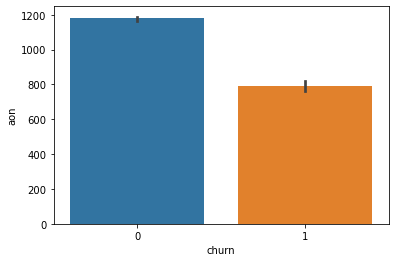

In [39]:
sns.barplot(x='churn', y='aon', data=dt_hvc)

Aon is the main factor for non-churn.

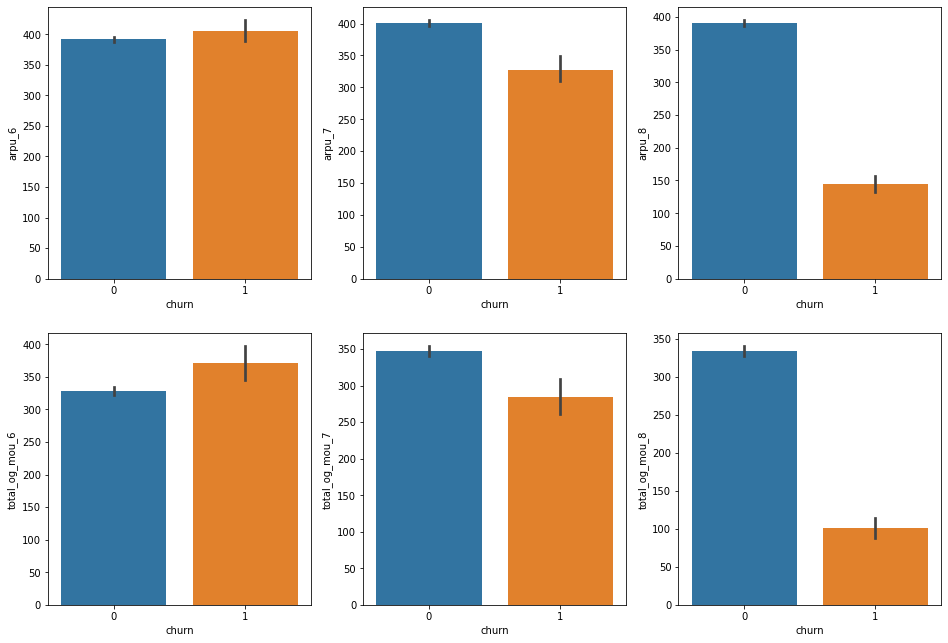

In [40]:
plt.figure(figsize=(16,11))
plt.subplot(2,3,1)
sns.barplot(x='churn', y='arpu_6', data=dt_hvc)
plt.subplot(2,3,2)
sns.barplot(x='churn', y='arpu_7', data=dt_hvc)
plt.subplot(2,3,3)
sns.barplot(x='churn', y='arpu_8', data=dt_hvc)
plt.subplot(2,3,4)
sns.barplot(x='churn', y='total_og_mou_6', data=dt_hvc)
plt.subplot(2,3,5)
sns.barplot(x='churn', y='total_og_mou_7', data=dt_hvc)
plt.subplot(2,3,6)
sns.barplot(x='churn', y='total_og_mou_8', data=dt_hvc)

From above figure, Arpu of 8th month is important. Means have some arpu in 8th month then they are less likely to churn.

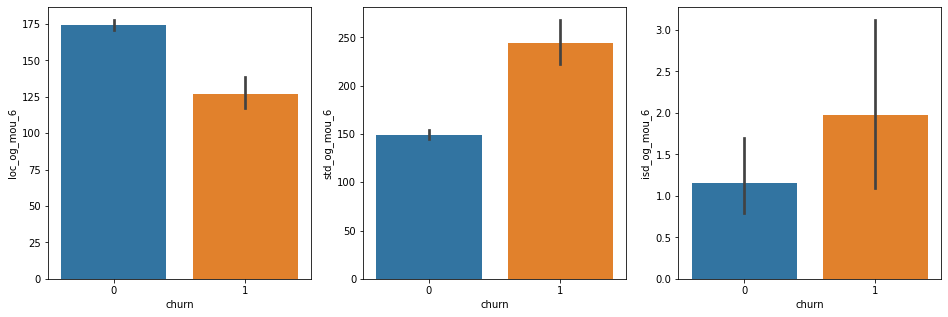

In [41]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.barplot(x='churn', y='loc_og_mou_6', data=dt_hvc)
plt.subplot(1,3,2)
sns.barplot(x='churn', y='std_og_mou_6', data=dt_hvc)
plt.subplot(1,3,3)
sns.barplot(x='churn', y='isd_og_mou_6', data=dt_hvc)

Those to do more local calling are less likely to churn.

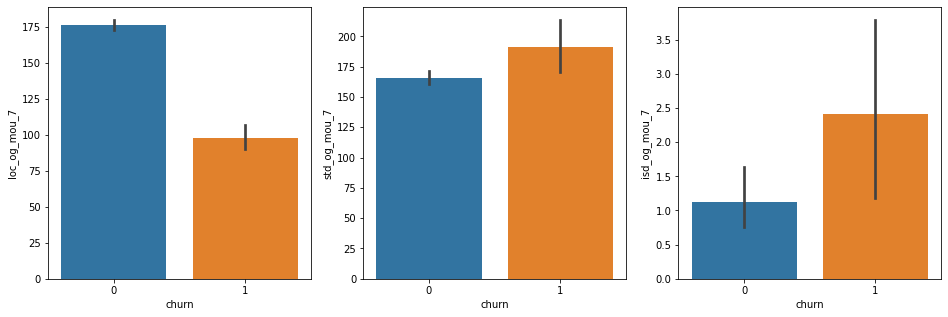

In [42]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.barplot(x='churn', y='loc_og_mou_7', data=dt_hvc)
plt.subplot(1,3,2)
sns.barplot(x='churn', y='std_og_mou_7', data=dt_hvc)
plt.subplot(1,3,3)
sns.barplot(x='churn', y='isd_og_mou_7', data=dt_hvc)

Those who are using sim only for ISD call are more likely to churn.

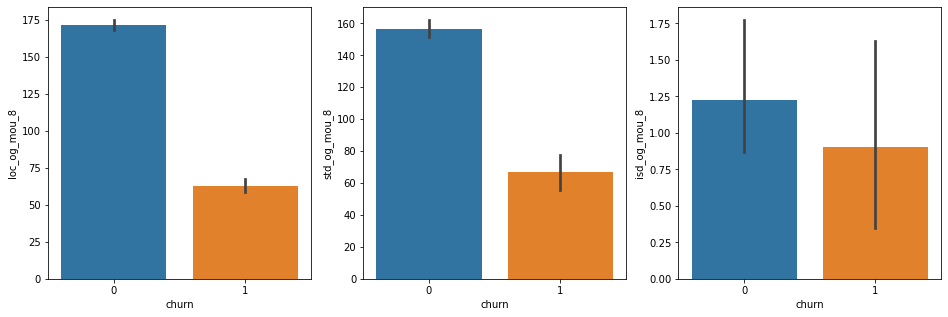

In [43]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.barplot(x='churn', y='loc_og_mou_8', data=dt_hvc)
plt.subplot(1,3,2)
sns.barplot(x='churn', y='std_og_mou_8', data=dt_hvc)
plt.subplot(1,3,3)
sns.barplot(x='churn', y='isd_og_mou_8', data=dt_hvc)

Same here as well. More local calling means less likely to churn.

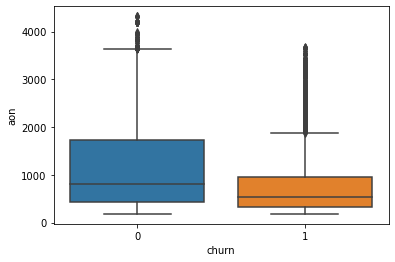

In [44]:
sns.boxplot(x='churn', y='aon', data=dt_hvc)

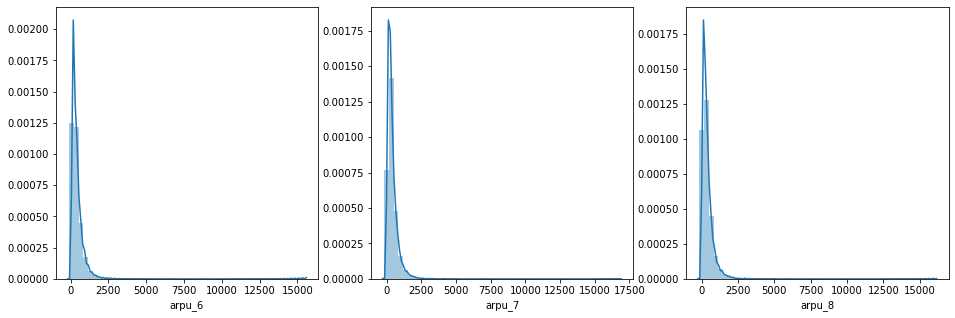

In [45]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(dt_hvc['arpu_6'])
plt.subplot(1,3,2)
sns.distplot(dt_hvc['arpu_7'])
plt.subplot(1,3,3)
sns.distplot(dt_hvc['arpu_8'])

Seems like are outliers present.

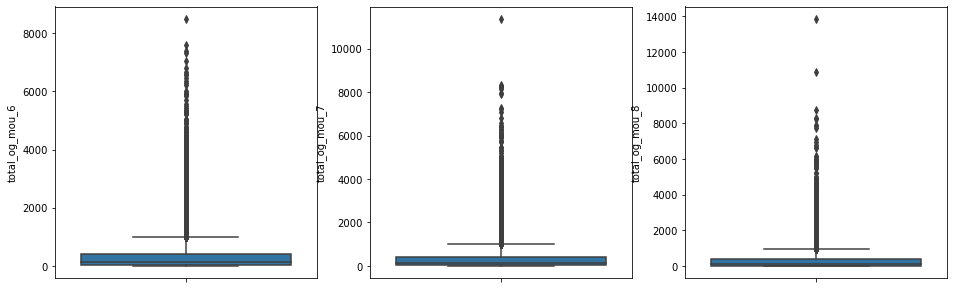

In [46]:
# We will check few more columns as well to check if outlier is present or not.
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.boxplot(y='total_og_mou_6', data=dt_hvc, hue='churn')
plt.subplot(1,3,2)
sns.boxplot(y='total_og_mou_7', data=dt_hvc, hue='churn')
plt.subplot(1,3,3)
sns.boxplot(y='total_og_mou_8', data=dt_hvc, hue='churn')

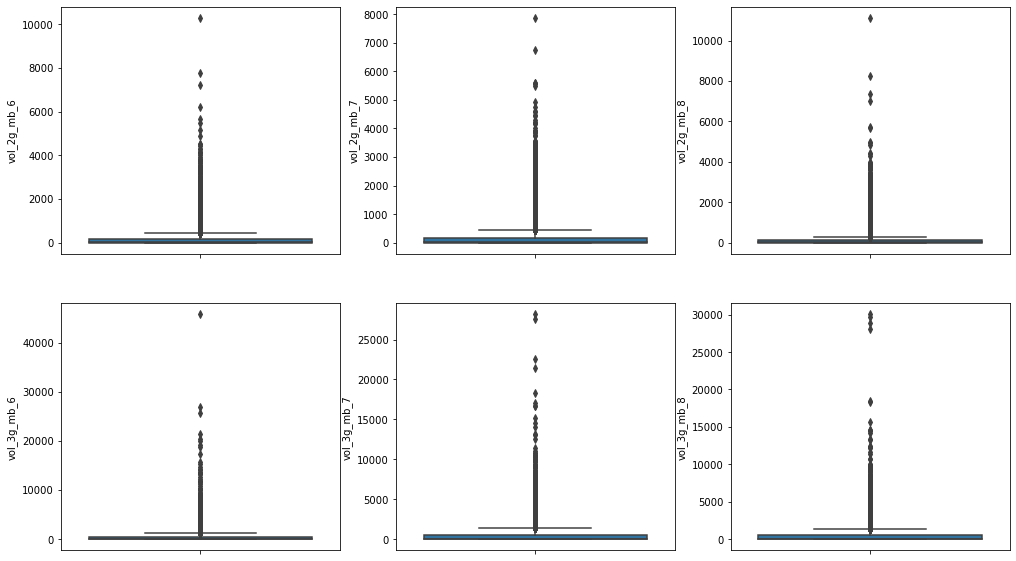

In [47]:
# We will check few more columns as well to check if outlier is present or not.
plt.figure(figsize=(17,10))
plt.subplot(2,3,1)
sns.boxplot(y='vol_2g_mb_6', data=dt_hvc, hue='churn')
plt.subplot(2,3,2)
sns.boxplot(y='vol_2g_mb_7', data=dt_hvc, hue='churn')
plt.subplot(2,3,3)
sns.boxplot(y='vol_2g_mb_8', data=dt_hvc, hue='churn')
plt.subplot(2,3,4)
sns.boxplot(y='vol_3g_mb_6', data=dt_hvc, hue='churn')
plt.subplot(2,3,5)
sns.boxplot(y='vol_3g_mb_7', data=dt_hvc, hue='churn')
plt.subplot(2,3,6)
sns.boxplot(y='vol_3g_mb_8', data=dt_hvc, hue='churn')

There is a lot of outliers almost in each column. Therefore we will treat it.

### Outliers treatment.

In [48]:
def outlier_cap(dt_hvc,cont_cols):
    for col in cont_cols :
        val = dt_hvc[col].quantile(0.995)
        dt_hvc[col] = np.where(dt_hvc[col] > val,val,dt_hvc[col])
    return dt_hvc

In [49]:
dt_hvc.describe(percentiles=[0.0,0.25,0.5,0.75,0.9,0.95,0.99,0.999])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,2.994700e+04,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.00000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000
mean,7.001183e+09,392.842977,394.917544,369.961371,135.008047,138.961574,126.779446,213.564808,215.425479,203.189011,10.485153,7.827040,8.447695,13.955359,9.870807,10.509753,59.256917,59.710587,55.264975,106.254639,104.895096,102.570994,4.190545,4.267238,3.988413,1.503681,1.813307,1.617468,170.195106,169.343233,162.596145,69.809344,75.044068

In [50]:
cont_cols = dt_hvc.select_dtypes(np.number).columns
dt_hvc = outlier_cap(dt_hvc,cont_cols)
dt_hvc.describe(percentiles=[0.0,0.25,0.5,0.75,0.9,0.95,0.99,0.999])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,2.994700e+04,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.00000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.0,29947.0,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.00000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000,29947.000000
mean,7.001183e+09,388.271799,389.730526,365.238027,129.747879,133.200763,121.372840,209.185775,210.152882,197.936520,9.160457,6.166426,6.779044,12.276981,8.381715,8.746807,54.540034,54.440342,50.876212,103.293753,102.495324,100.486482,3.946454,4.017223,3.763259,1.386240,1.622616,1.469458,166.278280,165.071096,159.054557,64.927240,70.096696,61.747768,81

***This function is to check whether we can get an aggregate column by combining few cols (so that we can remove those aggregrate columns)***

In [51]:
def aggregate_cols(call_type,month,out_col,row_num):
    cols = [col for col in dt_hvc.columns if call_type in col and month in col]
    total_col = [col for col in cols if out_col in col]
    print("The value of ",total_col,"is equal to sum of the below cols : ")
    tot_str=''.join(total_col)
    cols.remove(tot_str)
    print(cols)
    # lets check whether total_mou for $call_type in $month is same as sum of others
    print(round(dt_hvc.loc[row_num,tot_str]))
    print(round(dt_hvc.loc[row_num,cols].sum()))

In [52]:
aggregate_cols("std_og","_6","std_og_mou",8)

The value of  ['std_og_mou_6'] is equal to sum of the below cols : 
['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6']
130.0
130.0


In [53]:
aggregate_cols("loc_og","_6","loc_og_mou",8)

The value of  ['loc_og_mou_6'] is equal to sum of the below cols : 
['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6']
378.0
378.0


In [54]:
aggregate_cols("std_og","_7","std_og_mou",8)

The value of  ['std_og_mou_7'] is equal to sum of the below cols : 
['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7']
143.0
143.0


In [55]:
aggregate_cols("loc_og","_7","loc_og_mou",8)

The value of  ['loc_og_mou_7'] is equal to sum of the below cols : 
['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7']
288.0
288.0


In [56]:
aggregate_cols("loc_ic","_6","loc_ic_mou",8)

The value of  ['loc_ic_mou_6'] is equal to sum of the below cols : 
['loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6']
81.0
81.0


In [57]:
aggregate_cols("std_ic","_6","std_ic_mou",8)

The value of  ['std_ic_mou_6'] is equal to sum of the below cols : 
['std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6']
22.0
22.0


***similarly the total_og_mou_6 is equal to sum of values of og columns like 'loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6'***

Based on the above analysis, we can drop these columns (we can remove the aggregate columns for outgoing, incoming and total mou)<br>
'std_og_mou_6', <br>'std_og_mou_7', <br>'std_og_mou_8', <br> 'loc_og_mou_6', <br> 'loc_og_mou_7', <br> 
'loc_og_mou_8', <br> 'total_og_mou_6', <br> 'total_og_mou_7', <br> 'total_og_mou_8' <br>
'std_ic_mou_6', <br>'std_ic_mou_7', <br>'std_ic_mou_8', <br> 'loc_ic_mou_6', <br> 'loc_ic_mou_7', <br> 
'loc_ic_mou_8', <br> 'total_ic_mou_6', <br> 'total_ic_mou_7', <br> 'total_ic_mou_8' <br>

In [58]:
cols_to_drop = ['std_og_mou_6','std_og_mou_7','std_og_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8',
                'total_og_mou_6','total_og_mou_7','total_og_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8',
                'loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
dt_hvc.drop(cols_to_drop, axis=1, inplace=True)

In [59]:
dt_hvc.shape

(29947, 115)

In [60]:
dt_hvc.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7.000843e+09,197.385,214.816,213.803,28.58,26.98,0.00,94.335,91.76,0.00,0.0,0.0,0.0,0.0,0.0,0.0,12.34,12.11,0.00,43.14,42.84,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.53,1.23,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.06,0.49,0.00,0.0,0.0,0.0,17.74,17.84,0.16,64.77,64.99,4.13,1.7,1.78,1.15,0.0,0.00,0.00,1.90,1.86,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,1.0
1,7.001866e+09,34.047,355.074,268.321,24.11,78.68,7.68,15.740,99.84,304.76,0.0,0.0,0.0,0.0,0.0,0.0,23.88,74.56,7.68,11.51,75.94,291.86,0.0,0.0,0.0,0.0,2.91,0.00,0.23,4.11,0.00,0.00,0.46,0.13,0.0,0.0,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.0,0.0,0.0,1.61,29.91,29.23,17.48,65.38,375.58,0.0,8.93,3.61,0.0,0.00,2.35,5.90,0.00,12.49,0.0,0.0,0.0,0.0,0.0,0.0,1.83,0.00,0.00,0.00,0.0,0.0,4.0,9.0,11.0,74.0,384.0,283.0,44.0,154.0,65.0,44.0,23.0,30.0,0.0,1.0,2.0,0.0,154.0,50.0,0.00,108.07,365.47,0.00,0.00,0.00,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1006.0,0.00,0.00,0.00,0.00,0.0
4,7.000142e+09,261.636,309.876,238.174,50.31,149.44,83.89,76.960,91.88,124.26,0.0,0.0,0.0,0.0,0.0,0.0,50.31,149.44,83.89,67.64,91.88,124.26,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,9.31,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,105.68,88.49,233.81,106.84,109.54,104.13,1.5,0.00,0.00,0.0,0.00,0.86,1.93,0.25,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.48,0.0,0.0,5.0,6.0,3.0,196.0,350.0,287.0,56.0,110.0,110.0,50.0,110.0,110.0,1.0,0.0,0.0,56.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1526.0,0.00,0.00,0.00,0.00,0.0
8,7.001525e+09,378.721,492.223,137.362,413.69,351.03,35.08,94.660,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,80.96,70.58,50.54,0.0,0.0,0.0,0.0,0.00,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,10.23,0.0,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.0,0.00,0.00,0.0,0.58,0.10,22.43,4.08,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.1

In [61]:
# Removing the mobiel_number column as well.
dt_hvc.drop('mobile_number', axis=1, inplace=True)

In [62]:
dt_hvc.to_csv('abc.csv', index=False)

## Performing Modelling Part

**Splitting the dataset into trainset and testset.**

In [63]:
train, test = train_test_split(dt_hvc, test_size=0.30, random_state=14)

In [64]:
print(train.shape)
print(test.shape)

(20962, 114)
(8985, 114)


For few variables the value is very low and for few variables it is very high, so decide to perform scaling.

In [65]:
sc = MinMaxScaler()

In [66]:
col = train.columns

In [67]:
col1 = col.drop('churn')

In [68]:
col1

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=113)

In [69]:
train[col1] = sc.fit_transform(train[col1])

In [70]:
test[col1] = sc.transform(test[col1]) 

In [71]:
train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
28397,0.115051,0.152725,0.123635,0.007024,0.000315,0.002642,0.019161,0.018225,0.032034,0.015204,0.0,0.003252,0.006612,0.0,0.012733,0.006686,0.000541,0.000000,0.032271,0.032974,0.046378,0.013548,0.038148,0.021783,0.0,0.000000,0.0,0.002748,0.000000,0.003279,0.002822,0.000291,0.005745,0.0,0.044958,0.000793,0.0,0.0,0.0,0.007921,0.034664,0.053761,0.0,0.0,0.0,0.000000,0.000000,0.006628,0.018419,0.040298,0.016012,0.011483,0.010308,0.001884,0.001209,0.000000,0.0,0.117184,0.126446,0.065149,1.0,1.000000,1.000000,0.000000,0.219178,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.142857,0.051724,0.169811,0.082383,0.078992,0.062372,0.161935,0.154,0.031546,0.045802,0.235115,0.016155,0.0625,0.058824,0.117647,0.150753,0.127735,0.045045,0.010953,0.018492,0.016951,0.114738,0.112070,0.121842,0.5,0.5,0.0,0.000000,0.000000,0.142857,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.043503,0.137566,0.121494,0.050014,0.0,0.0
47093,0.205326,0.207289,0.219263,0.039884,0.033801,0.027620,0.103142,0.095333,0.064995,0.002764,0.0,0.002649,0.005051,0.0,0.025957,0.063354,0.050729,0.043435,0.190006,0.171584,0.108630,0.000000,0.009304,0.000000,0.0,0.000000,0.0,0.000755,0.005412,0.000345,0.011787,0.014288,0.008710,0.0,0.013164,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.094304,0.0,0.0,0.0,0.024444,0.054679,0.037690,0.176170,0.189259,0.158141,0.060984,0.002877,0.000000,0.017735,0.007808,0.0,0.023405,0.062891,0.005936,0.0,0.052720,0.017829,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.022876,0.0,0.0,0.232143,0.189655,0.226415,0.200183,0.120811,0.155929,0.115668,0.110,0.136698,0.000000,0.000000,0.000000,0.4375,0.352941,0.352941,0.304442,0.176673,0.191892,0.145633,0.225726,0.111786,0.042098,0.000000,0.036999,0.0,0.0,0.0,0.500000,0.420463,0.428571,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.839816,0.088576,0.000000,0.144632,0.0,0.0
83804,0.149500,0.189213,0.132425,0.003032,0.006607,0.003542,0.004168,0.021119,0.006342,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.005026,0.011367,0.006052,0.007258,0.037990,0.012293,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000236,0.000726,0.001376,0.000000,0.0,0.072777,0.000000,0.0,0.0,0.0,0.000000,0.011447,0.000000,0.0,0.0,0.0,0.012729,0.018135,0.005224,0.011706,0.043628,0.012965,0.000000,0.002158,0.000000,0.000000,0.000000,0.0,0.004343,0.032660,0.003243,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,

In [72]:
X_train = train.drop('churn', axis=1)
y_train = train['churn']
X_test = test.drop('churn', axis=1)
y_test = test['churn']

In [73]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20962, 113)
(20962,)
(8985, 113)
(8985,)


**As we have class imbalance problem. To encounter this we will use oversampling technique called SMOTE.**

In [74]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state = 2) 
X_train_res, y_train_res = smo.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 1767
Before OverSampling, counts of label '0': 19195 

After OverSampling, the shape of train_X: (38390, 113)
After OverSampling, the shape of train_y: (38390,) 

After OverSampling, counts of label '1': 19195
After OverSampling, counts of label '0': 19195


In [75]:
X_train_res.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.115051,0.152725,0.123635,0.007024,0.000315,0.002642,0.019161,0.018225,0.032034,0.015204,0.0,0.003252,0.006612,0.0,0.012733,0.006686,0.000541,0.000000,0.032271,0.032974,0.046378,0.013548,0.038148,0.021783,0.0,0.000000,0.0,0.002748,0.000000,0.003279,0.002822,0.000291,0.005745,0.0,0.044958,0.000793,0.0,0.0,0.0,0.007921,0.034664,0.053761,0.0,0.0,0.0,0.000000,0.000000,0.006628,0.018419,0.040298,0.016012,0.011483,0.010308,0.001884,0.001209,0.000000,0.0,0.117184,0.126446,0.065149,1.0,1.000000,1.000000,0.000000,0.219178,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.142857,0.051724,0.169811,0.082383,0.078992,0.062372,0.161935,0.154,0.031546,0.045802,0.235115,0.016155,0.0625,0.058824,0.117647,0.150753,0.127735,0.045045,0.010953,0.018492,0.016951,0.114738,0.112070,0.121842,0.5,0.5,0.0,0.000000,0.000000,0.142857,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.043503,0.137566,0.121494,0.050014,0.0
1,0.205326,0.207289,0.219263,0.039884,0.033801,0.027620,0.103142,0.095333,0.064995,0.002764,0.0,0.002649,0.005051,0.0,0.025957,0.063354,0.050729,0.043435,0.190006,0.171584,0.108630,0.000000,0.009304,0.000000,0.0,0.000000,0.0,0.000755,0.005412,0.000345,0.011787,0.014288,0.008710,0.0,0.013164,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.094304,0.0,0.0,0.0,0.024444,0.054679,0.037690,0.176170,0.189259,0.158141,0.060984,0.002877,0.000000,0.017735,0.007808,0.0,0.023405,0.062891,0.005936,0.0,0.052720,0.017829,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.022876,0.0,0.0,0.232143,0.189655,0.226415,0.200183,0.120811,0.155929,0.115668,0.110,0.136698,0.000000,0.000000,0.000000,0.4375,0.352941,0.352941,0.304442,0.176673,0.191892,0.145633,0.225726,0.111786,0.042098,0.000000,0.036999,0.0,0.0,0.0,0.500000,0.420463,0.428571,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.839816,0.088576,0.000000,0.144632,0.0
2,0.149500,0.189213,0.132425,0.003032,0.006607,0.003542,0.004168,0.021119,0.006342,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.005026,0.011367,0.006052,0.007258,0.037990,0.012293,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000236,0.000726,0.001376,0.000000,0.0,0.072777,0.000000,0.0,0.0,0.0,0.000000,0.011447,0.000000,0.0,0.0,0.0,0.012729,0.018135,0.005224,0.011706,0.043628,0.012965,0.000000,0.002158,0.000000,0.000000,0.000000,0.0,0.004343,0.032660,0.003243,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.107

## PCA

In [76]:
# apply pca to train data
pca = IncrementalPCA(n_components = 60)

In [77]:
X_train_pca = pca.fit_transform(X_train_res)

In [78]:
# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0     14.19
1     23.31
2     29.76
3     35.16
4     39.22
5     42.89
6     46.27
7     49.04
8     51.41
9     53.59
10    55.57
11    57.51
12    59.26
13    60.99
14    62.65
15    64.15
16    65.59
17    67.02
18    68.41
19    69.71
20    70.98
21    72.16
22    73.29
23    74.34
24    75.33
25    76.25
26    77.14
27    78.02
28    78.86
29    79.69
30    80.45
31    81.18
32    81.90
33    82.60
34    83.29
35    83.97
36    84.61
37    85.25
38    85.84
39    86.42
40    86.98
41    87.52
42    88.04
43    88.53
44    89.00
45    89.47
46    89.91
47    90.35
48    90.75
49    91.12
50    91.48
51    91.81
52    92.13
53    92.44
54    92.75
55    93.04
56    93.30
57    93.56
58    93.78
59    94.00
dtype: float64


In [79]:
var_ratio = np.cumsum(pca.explained_variance_ratio_)

Text(0, 0.5, 'Variance Explained')

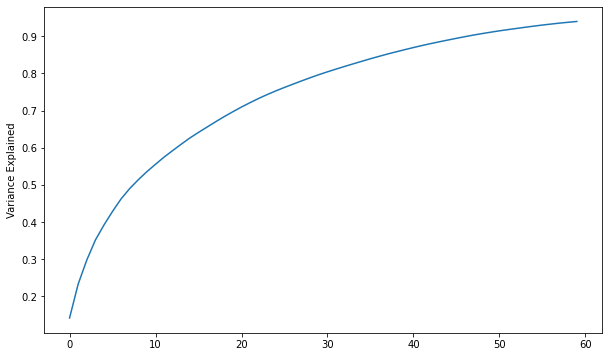

In [80]:
plt.figure(figsize=(10,6))
plt.plot(var_ratio)
plt.ylabel('Variance Explained')

## PCA and Random Forest Classifier

In [81]:
rmf = RandomForestClassifier(n_estimators=500)

In [82]:
rmf.fit(X_train_pca, y_train_res)

RandomForestClassifier(n_estimators=500)

In [83]:
X_test_res, y_test_res = smo.fit_sample(X_test, y_test.ravel())

In [84]:
X_test_pca = pca.transform(X_test_res)

In [85]:
y_pred = rmf.predict(X_test_pca)

In [86]:
print(accuracy_score(y_test_res, y_pred))
print(confusion_matrix(y_test_res, y_pred))
print(classification_report(y_test_res, y_pred))

0.7878696073679108
[[7785  467]
 [3034 5218]]
              precision    recall  f1-score   support

         0.0       0.72      0.94      0.82      8252
         1.0       0.92      0.63      0.75      8252

    accuracy                           0.79     16504
   macro avg       0.82      0.79      0.78     16504
weighted avg       0.82      0.79      0.78     16504



**Performing hyperparameter tuning**

In [87]:
n_estimators = [int(x) for x in np.linspace(100,1000,50)]
max_features = ['sqrt','auto','log2']
max_depth = [int(x) for x in np.linspace(10,110,11)]
max_depth.append(None)
min_samples_split = [2,5,7,10,15,30]
min_samples_leaf = [2,4,6,8,10,20]
bootstrap = [True, False]

In [88]:
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap' : bootstrap}

In [89]:
grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=random_grid, verbose=3,
                   cv=3, n_jobs=-1, scoring='accuracy', return_train_score=True)

In [ ]:
grid.fit(X_train_pca, y_train_res)

In [90]:
# From grid search these are our best parameter value.

In [155]:
rmf = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=200, min_samples_leaf=100,
                            bootstrap=True)

In [156]:
rmf.fit(X_train_pca, y_train_res)

RandomForestClassifier(max_depth=8, min_samples_leaf=100, min_samples_split=200)

In [157]:
y_pred = rmf.predict(X_test_pca)

In [158]:
print(accuracy_score(y_test_res, y_pred))
print(confusion_matrix(y_test_res, y_pred))
print(classification_report(y_test_res, y_pred))

0.8141056713523994
[[6845 1407]
 [1661 6591]]
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82      8252
         1.0       0.82      0.80      0.81      8252

    accuracy                           0.81     16504
   macro avg       0.81      0.81      0.81     16504
weighted avg       0.81      0.81      0.81     16504



**We have seen after applying hyperparameter tuning we got 82% accuracy with good precision and recall.**

In [98]:
# Now with those hyperparameter result we will apply model without pca. Just to check how it is performing.

In [165]:
rmf = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=200, min_samples_leaf=100,
                            bootstrap=True)

In [166]:
rmf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=8, min_samples_leaf=100, min_samples_split=200)

In [167]:
y_pred = rmf.predict(X_test_res)

In [168]:
print(accuracy_score(y_test_res, y_pred))
print(confusion_matrix(y_test_res, y_pred))
print(classification_report(y_test_res, y_pred))

0.8864517692680562
[[7650  602]
 [1272 6980]]
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      8252
         1.0       0.92      0.85      0.88      8252

    accuracy                           0.89     16504
   macro avg       0.89      0.89      0.89     16504
weighted avg       0.89      0.89      0.89     16504



**Wow! it has given us tremendous accuracy jump almost 89% accuracy. We will save this model.**

In [171]:
# Save the model
import pickle

# Save the model as a pickle in a file 
pickle.dump(rmf, open('rf_model.pkl', 'wb'))

In [172]:
loaded_model = pickle.load(open('rf_model.pkl', 'rb'))

## Choosing the best features

In [106]:
#Calculating what the features important in prediction.
features = X_train_res.columns
imp = rmf.feature_importances_

In [105]:
features_imp = pd.DataFrame({'variables':features, 'important_features':imp*100})

In [110]:
features_imp = features_imp.sort_values('important_features', ascending=False).reset_index(drop=True)

In [112]:
print("Sum of importance=", features_imp.important_features.sum())
features_imp

Sum of importance= 100.0


,variables,important_features
0,total_rech_amt_8,10.982749
1,total_rech_data_8,8.047104
2,arpu_8,7.024409
3,max_rech_amt_8,6.968562
4,last_day_rch_amt_8,6.962053
5,av_rech_amt_data_8,4.653172
6,loc_ic_t2m_mou_8,4.187376
7,total_rech_num_8,3.869002
8,roam_og_mou_8,3.417703
9,spl_og_mou_8,3.415168


In [118]:
top_n = 20
top_features = features_imp.variables[0:top_n]

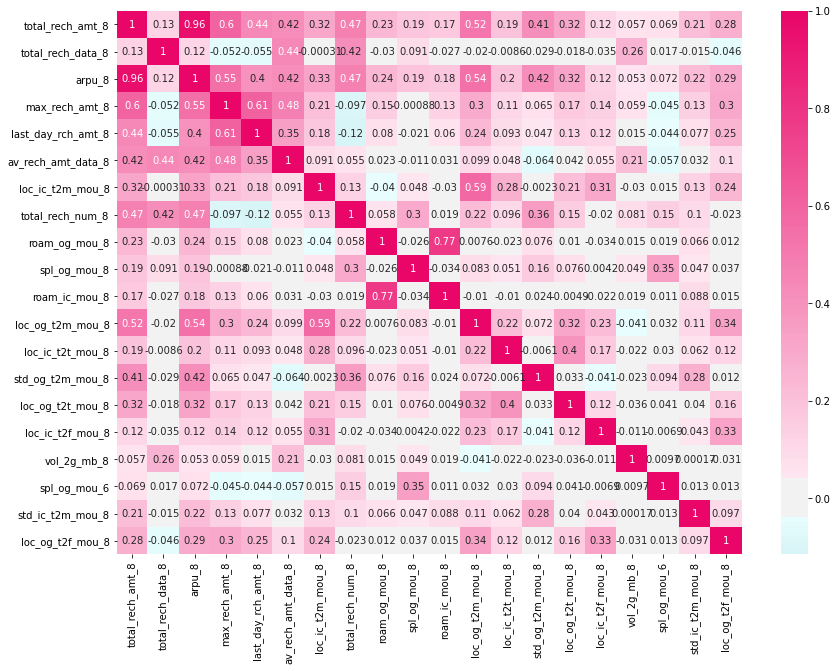

In [121]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(14,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap, annot=True)

In [ ]:
arpu_8, roam_og_mou_8, total_rech_data_8, std_og_t2m_mou_8, loc_og_t2t_mou_8, spl_og_mou_8

In [160]:
top_features = ['arpu_8', 'roam_og_mou_8', 'total_rech_data_8', 'std_og_t2m_mou_8', 'loc_og_t2t_mou_8', 'spl_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [161]:
rmf = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=200, min_samples_leaf=100,
                            bootstrap=True)

In [162]:
rmf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=100, min_samples_split=200)

In [163]:
y_pred = rmf.predict(X_test)

In [164]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9415692821368948
[[8183   69]
 [ 456  277]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      8252
         1.0       0.80      0.38      0.51       733

    accuracy                           0.94      8985
   macro avg       0.87      0.68      0.74      8985
weighted avg       0.94      0.94      0.93      8985

